In [14]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [6]:
df = pd.read_csv('Dados-Tarefa-02.csv')


,Index,d1,d2
0,0,1.225160,-0.951731
1,1,1.016304,-1.725175
2,2,0.335340,-1.724896
3,3,1.786348,-1.782653
4,4,1.016751,1.062569
...,...,...,...
995,995,0.929594,-0.743331
996,996,-0.338431,-0.343315
997,997,1.542708,-0.055665
998,998,0.816646,-1.250919


KMEANS

In [55]:
data = df[['d1','d2']]
k = 2

kmeans = KMeans(n_clusters=k,random_state=0,n_init='auto')
kmeans.fit(data)
data['cluster'] = kmeans.predict(data)


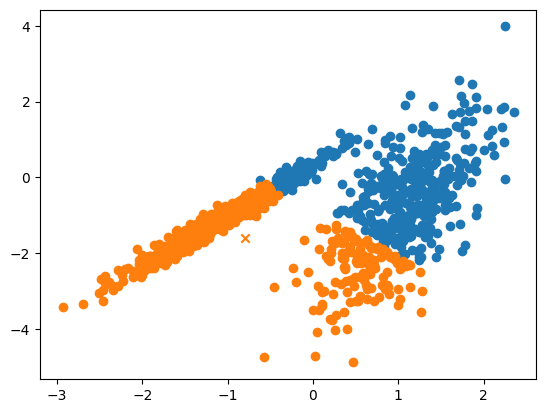

In [58]:
for i in range(k):
    row = data.index[kmeans.labels_ == i].tolist()
    scatter = plt.scatter(data.iloc[row,0],data.iloc[row,1])
    color = scatter.get_facecolors()[0].tolist()
    plt.scatter(kmeans.cluster_centers_[i][0],
                kmeans.cluster_centers_[i][1],
                color=color, marker='x')